<a href="https://colab.research.google.com/github/SimonSaysGiveMeSmile/Caffeinated-Treasury-Bot-ORIE-4741-/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ORIE 4741 / 5741 Term Project**
## *- Caffinated Treasury Bot*

### Authors:
Cecilia Yang - xy96@cornell.edu <br>
Kayla Yang - <br>
Simon (Jiahe) Tian - jt886@cornell.edu <br>

## Project Objective

The purpose of this project is to empower user without sufficient financial knowledge to understand or improve their credit scores.

By providing the users with comprehensive insights and recommendations on how to improve their credit score, the users will be able to make informed decisions that will benifit their financial status in both short-term and long-term.

## Executive Summary

## Project Outline

## Dataset Research and Initial Analysis

### Dataset #1: Credit Score Classification

URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data<br>
Number of Columns: 27<br>
Number of Rows: 50000<br>
Missing Headings? NO<br>
Mising Values? YES<br>
Pseudodata? MAYBE<br>

**Commment:** <br>
Included in the analysis as the dataset is large and contains many features.


### Dataset #2: Credit Card Approval Prediction

URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data<br>
Number of Columns: 18<br>
Number of Rows: 50000<br>
Missing Headings? NO<br>
Mising Values? YES<br>
Pseudodata? MAYBE<br>

**Commment:** <br>
Included in the analysis as the dataset is large and contains many features.

## Importing Packages

In [4]:
# Import data manipulation libraries
#import necessary packages
import re
import pandas as pd
import numpy as np
from scipy import stats

import plotly.express as px
px.defaults.width, px.defaults.height = 1000, 600

# Set precision
pd.set_option('display.precision', 4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This sets the aesthetics for seaborn plots
sns.set()

from scipy.stats import percentileofscore

## Credit Score Prediction Dataset (Dataset #1)

### Data Cleaning

In [31]:
#Import CSV Files for Dataset #1
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

print("Size of the training set: ", df_train.shape)
print("Size of the testing set: ", df_test.shape)

<ipython-input-31-1cfd7955d060>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('train.csv')


Size of the training set:  (100000, 28)
Size of the testing set:  (50000, 27)


In [32]:
#remove duplicated rows
df_train_unique = df_train.drop_duplicates(keep='first')
df_test_unique = df_test.drop_duplicates(keep='first')

print("Size of the training set after dpuplicate removal: ", df_train_unique.shape)
print("Size of the testing set after duplicate removal: ", df_test_unique.shape)

Size of the training set after dpuplicate removal:  (100000, 28)
Size of the testing set after duplicate removal:  (50000, 27)


## Training Dataset Cleaning

In [8]:
#convert the following columns to numerical columns
df_train_unique['Age'] = pd.to_numeric(df_train_unique['Age'], errors='coerce')
df_train_unique['Annual_Income'] = pd.to_numeric(df_train_unique['Annual_Income'], errors='coerce')
df_train_unique['Outstanding_Debt'] = pd.to_numeric(df_train_unique['Outstanding_Debt'], errors='coerce')
df_train_unique['Amount_invested_monthly'] = pd.to_numeric(df_train_unique['Amount_invested_monthly'], errors='coerce')
df_train_unique['Monthly_Balance'] = pd.to_numeric(df_train_unique['Monthly_Balance'], errors='coerce')
df_train_unique['Changed_Credit_Limit'] = pd.to_numeric(df_train_unique['Changed_Credit_Limit'], errors='coerce')
df_train_unique['Monthly_Balance'] = pd.to_numeric(df_train_unique['Monthly_Balance'], errors='coerce')
df_train_unique['Num_of_Loan'] = pd.to_numeric(df_train_unique['Num_of_Loan'], errors='coerce')
df_train_unique['Num_of_Delayed_Payment'] = pd.to_numeric(df_train_unique['Num_of_Delayed_Payment'], errors='coerce')


In [9]:
df_train_unique.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.0000,9.3020e+04,84998.0000,100000.0000,100000.0000,100000.0000,95215.0000,100000.0000,90254.0000,97909.0000,98035.0000,98991.0000,100000.0000,100000.0000,91216.0000,98791.0000
mean,110.9345,1.7858e+05,4194.1708,17.0913,22.4744,72.4660,2.7803,21.0688,31.0331,10.3890,27.7543,1426.5037,32.2852,1403.1182,195.5395,402.5513
std,689.4079,1.4429e+06,3183.6862,117.4048,129.0574,466.4226,62.5009,14.8601,226.9558,6.7895,193.1773,1155.0458,5.1169,8306.0413,199.5645,213.9255
min,-500.0000,7.0059e+03,303.6454,-1.0000,0.0000,1.0000,-100.0000,-5.0000,-3.0000,-6.4900,0.0000,0.2300,20.0000,0.0000,0.0000,0.0078
25%,24.0000,1.9436e+04,1625.5682,3.0000,4.0000,8.0000,1.0000,10.0000,9.0000,5.3200,3.0000,566.0800,28.0526,30.3067,72.2367,270.1066
50%,33.0000,3.7551e+04,3093.7450,6.0000,5.0000,13.0000,3.0000,18.0000,14.0000,9.4000,6.0000,1166.3700,32.3058,69.2495,128.9545,336.7312
75%,42.0000,7.2843e+04,5957.4483,7.0000,7.0000,20.0000,5.0000,28.0000,18.0000,14.8700,9.0000,1948.2000,36.4967,161.2242,236.8158,470.2629
max,8698.0000,2.4198e+07,15204.6333,1798.0000,1499.0000,5797.0000,1496.0000,67.0000,4397.0000,36.9700,2597.0000,4998.0700,50.0000,82331.0000,1977.3261,1602.0405


As shown in above, after dropping the duplicated rows, there still exists unrealistic data within each columns.

For instance, the max age is shown to be "8698.00", or the maximum interest rate is "5797.00".

These outliers and unrealistic values will hinder the accuracy and generalization of the algorithms learned from this dataset.

Thus, we want to understand the dataset better and remove any outliers or NaN values that will interfer with the model training later.

The outlier_threshold function analyzes and visualizes the distribution of values in a DataFrame column up to a specified range (max_range).

It calculates the percentile of each value within this range and plots the differences between these percentiles to help identify potential outliers and distribution patterns.

The function also generates a histogram of the column values to visually assess the overall data spread.

**Key steps in the function include:**

1. Creating a sequence of values from 0 to max_range and calculating their percentile ranks.
2. Creating a DataFrame from these values and their percentiles, and computing differences between successive percentiles.
3. Plotting these percentile differences and the column's histogram to visualize the data distribution and any abrupt changes.
4. Determining outliers by calculating a threshold based on the quantile of the column that corresponds to a calculated max_percentile.


 Monthly_Inhand_Salary 



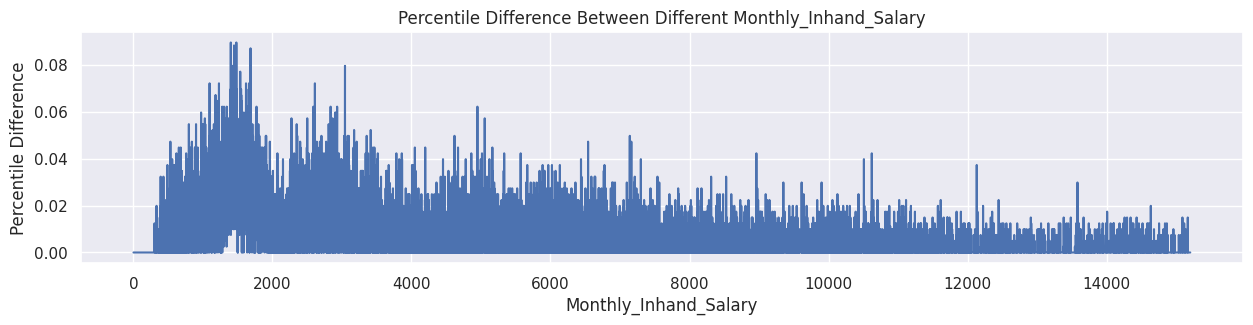

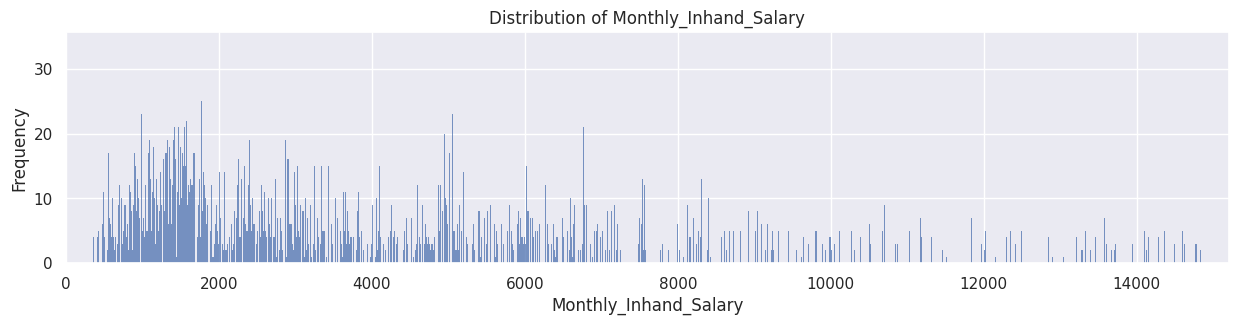

Number of outliers: 2

 Num_Bank_Accounts 



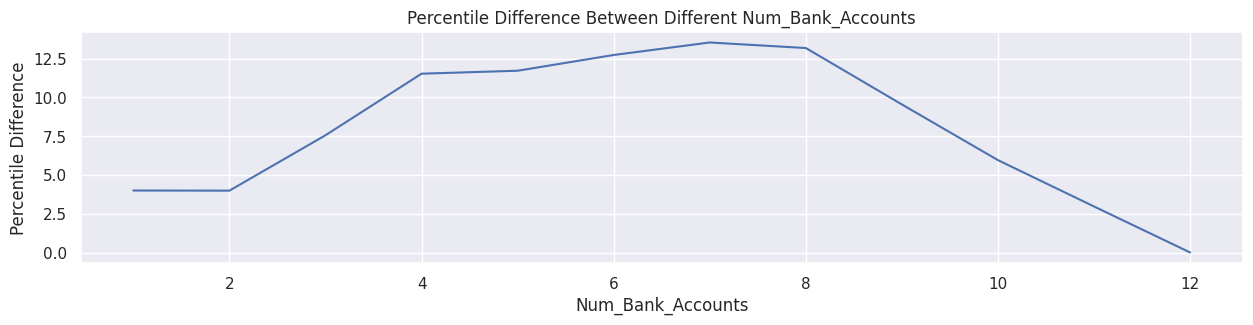

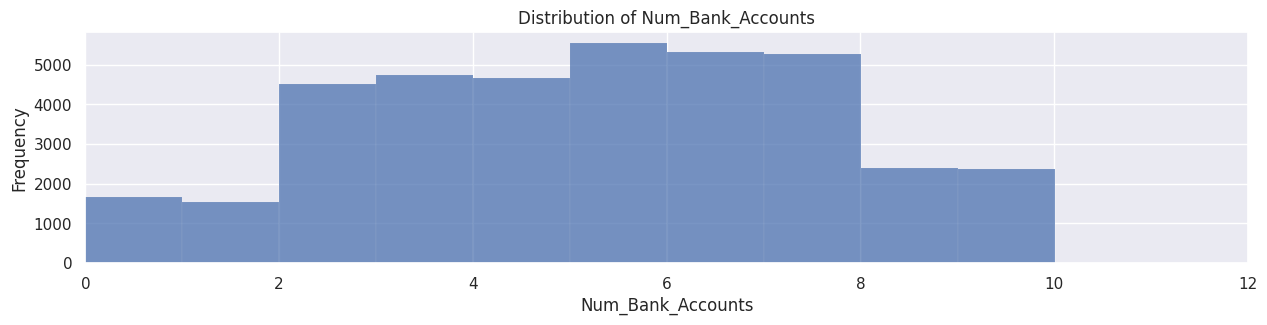

Number of outliers: 530

 Num_Credit_Card 



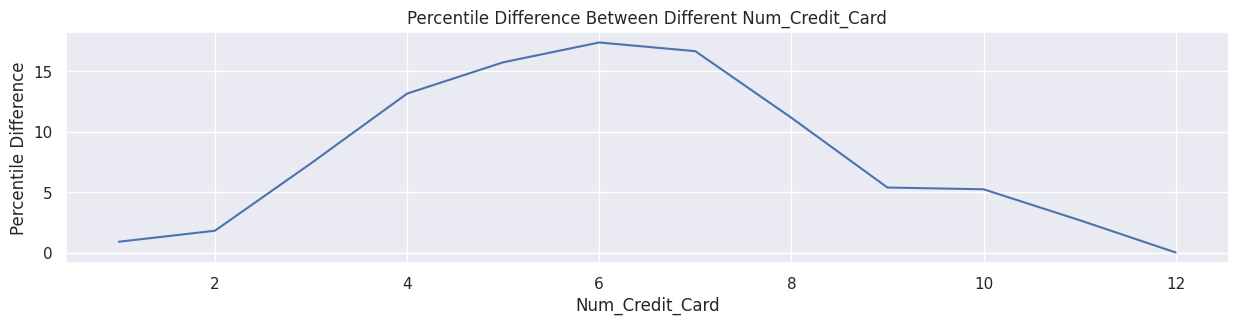

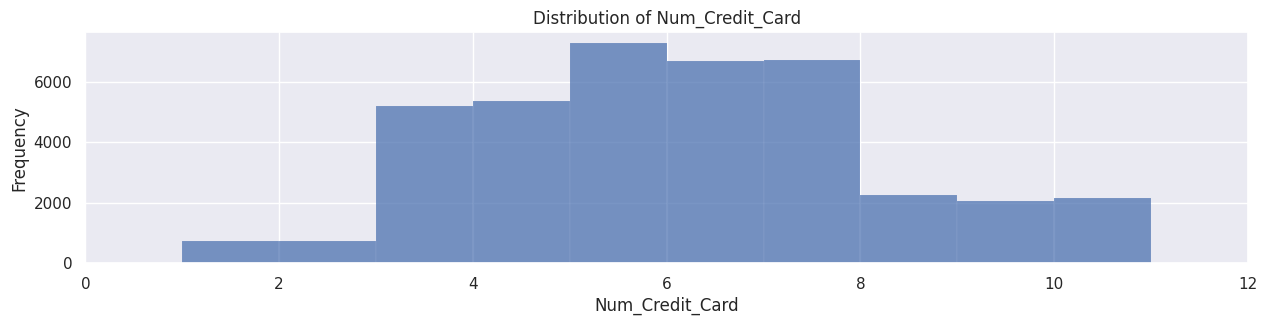

Number of outliers: 954

 Interest_Rate 



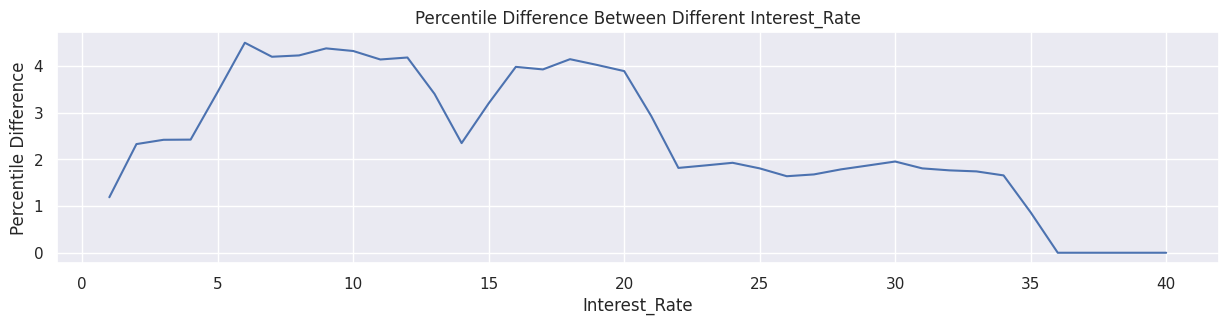

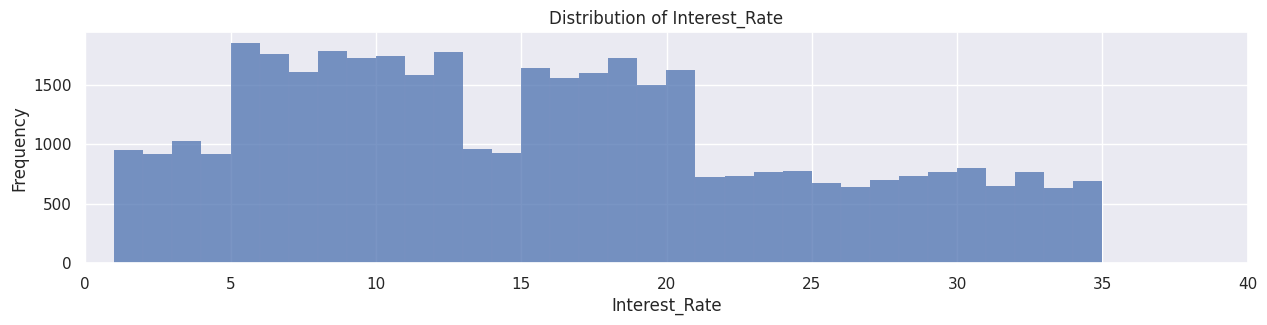

Number of outliers: 866

 Delay_from_due_date 



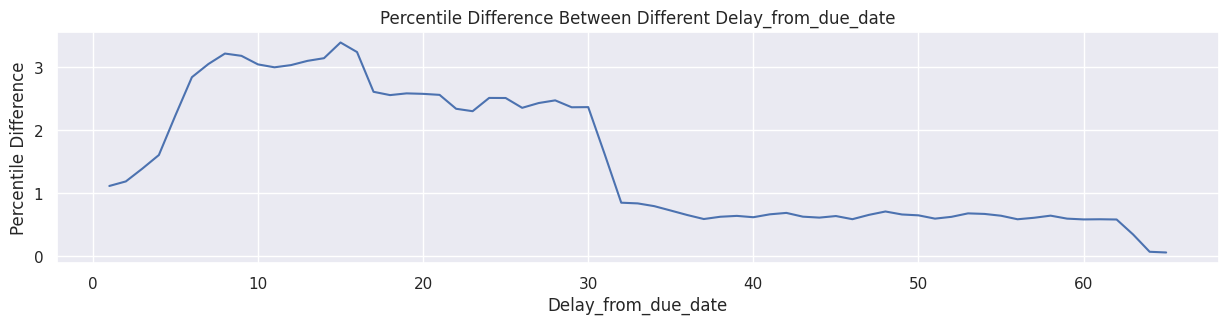

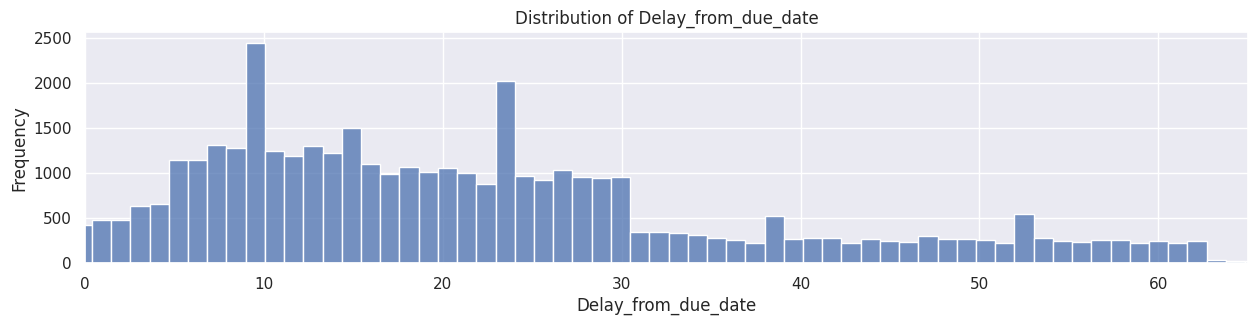

Number of outliers: 51

 Num_Credit_Inquiries 



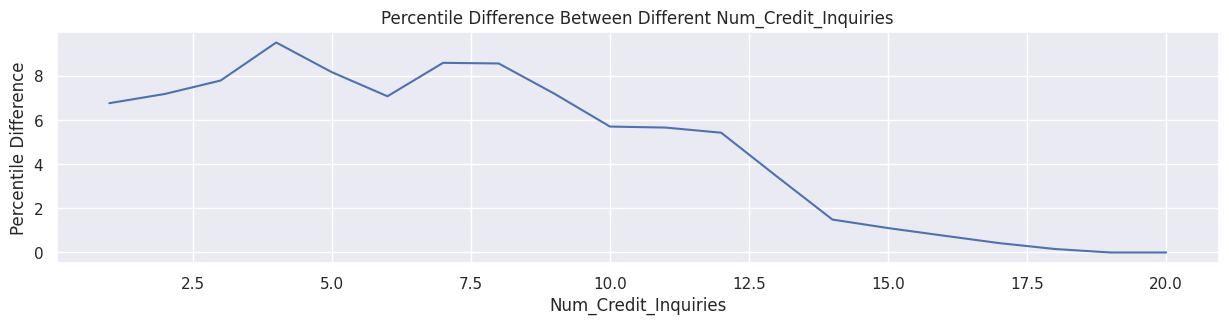

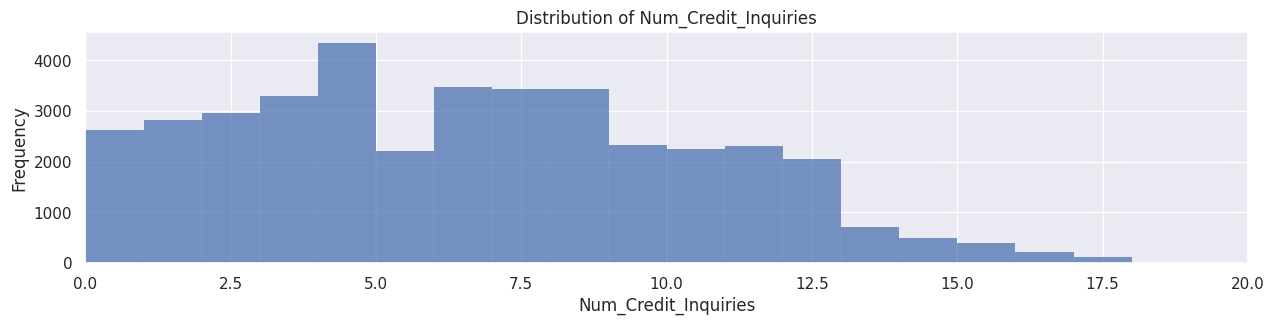

Number of outliers: 651

 Credit_Utilization_Ratio 



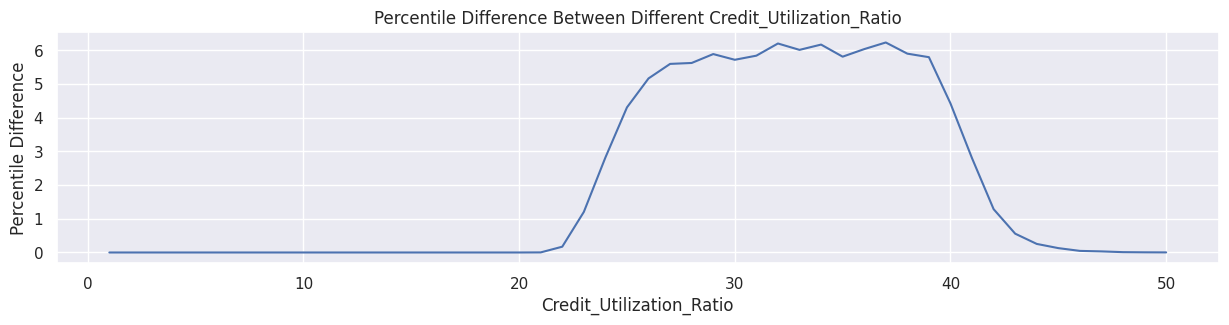

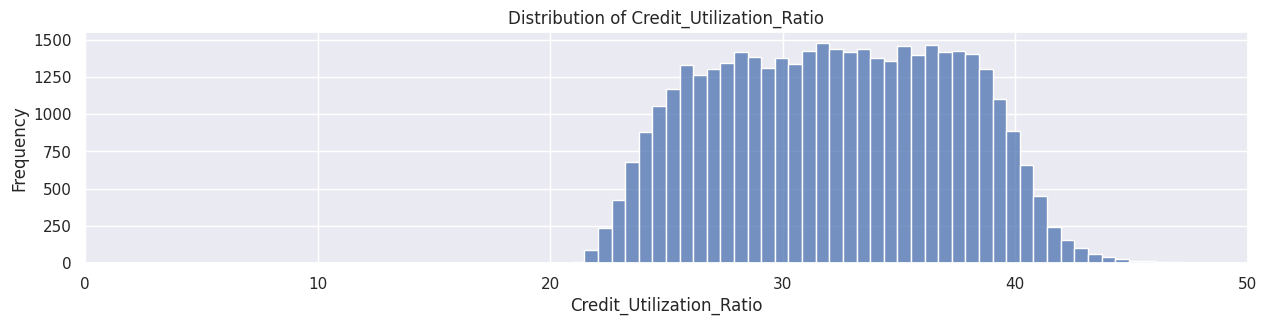

Number of outliers: 1

 Total_EMI_per_month 



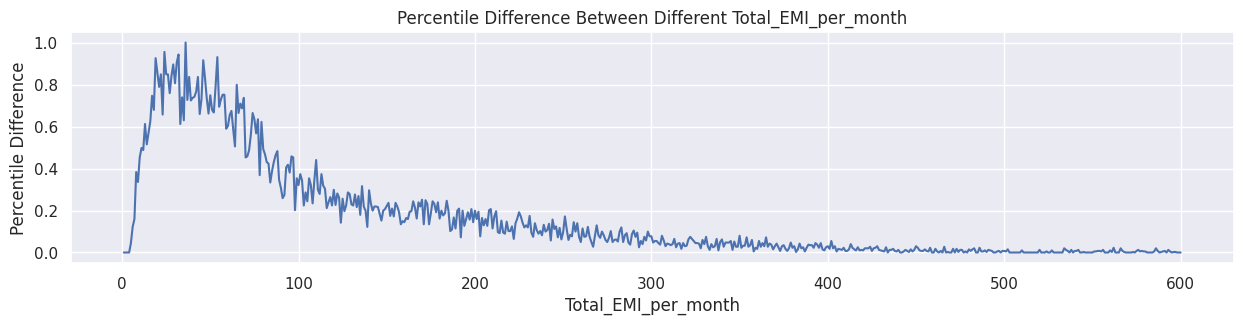

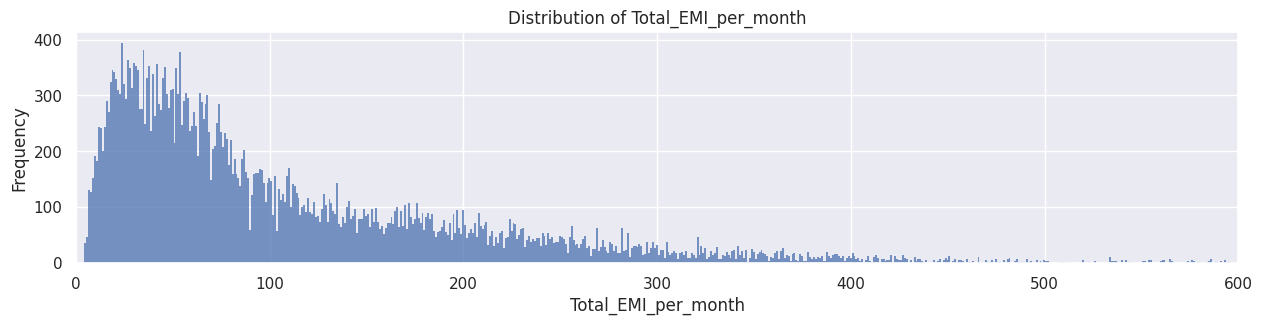

Number of outliers: 1599

 Num_of_Delayed_Payment 



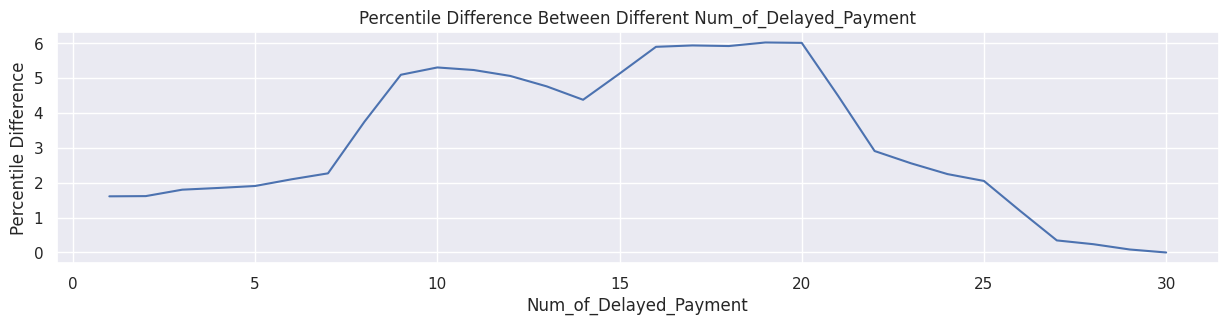

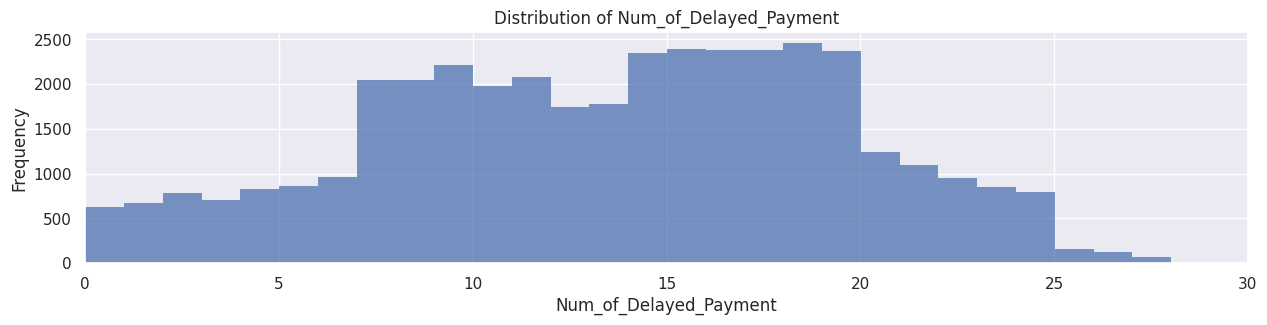

Number of outliers: 325

 Num_of_Loan 



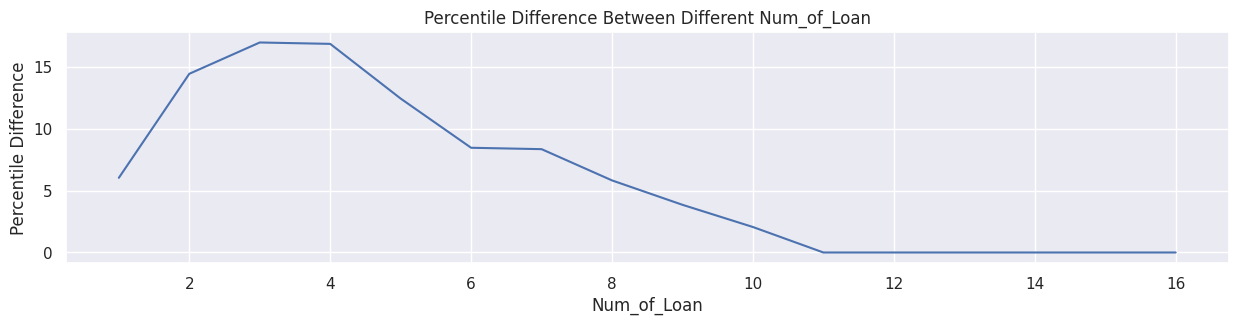

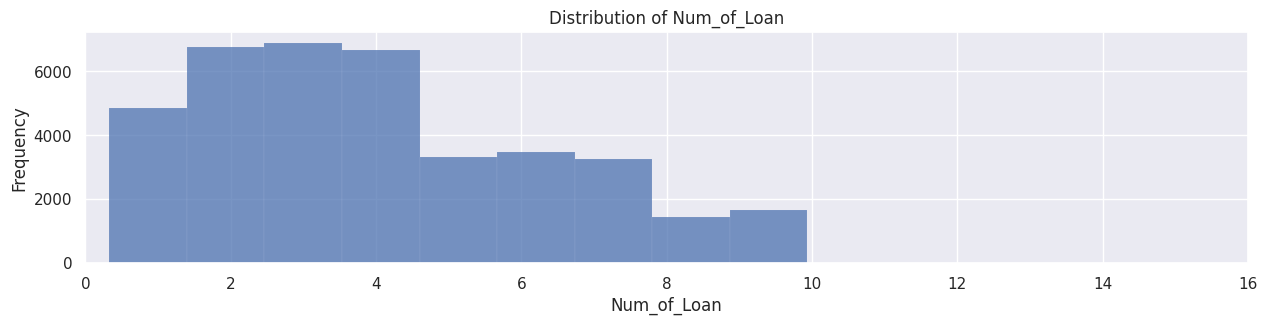

Number of outliers: 187


In [10]:
# Function Definition

def outlier_threshold(df, col_name, max_range):

    print("\n", col_name, "\n")

    # Calculate value at the specified percentile
    # max_range = df[col_name].quantile(max_percentile)

    # Generate the range of credit card numbers from 0 to the max_range
    num_cards = range(0, int(max_range) + 1)
    percentiles = {card: percentileofscore(df[col_name], card, kind='rank') for card in num_cards}

    max_percentile = percentileofscore(df[col_name], max_range, kind='rank')
    max_percentile /= 100

    # Convert dictionary to DataFrame
    percentile_df = pd.DataFrame(list(percentiles.items()), columns=[col_name, 'Percentile'])
    percentile_df['Percentile_Difference'] = percentile_df['Percentile'].diff()

    # Print the DataFrame of percentiles and differences
    # print(percentile_df)

    # Plotting the percentile differences
    plt.figure(figsize = (15, 3))
    plt.plot(percentile_df[col_name], percentile_df["Percentile_Difference"])
    plt.title('Percentile Difference Between Different ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('Percentile Difference')
    plt.show()

    # Plotting the distribution of the number of credit cards
    plt.figure(figsize=(15, 3))
    sns.histplot(df[col_name], kde=False, bins=int(df[col_name].max()))
    plt.xlim(0, max_range)
    plt.title('Distribution of ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

    # Counting outliers above a certain threshold
    threshold = df[col_name].quantile(max_percentile)
    print("Number of outliers:", len(df[df[col_name] >= threshold]))


# Drop all rows with NaN values for initial analysis
df_train_unique_clean = df_train_unique.dropna()
df_test_unique_clean = df_test_unique.dropna()

#Function calls
outlier_threshold(df_train_unique_clean, 'Monthly_Inhand_Salary', 15204.6333)
outlier_threshold(df_train_unique_clean, 'Num_Bank_Accounts', 12)
outlier_threshold(df_train_unique_clean, 'Num_Credit_Card', 12)
outlier_threshold(df_train_unique_clean, 'Interest_Rate', 40)
outlier_threshold(df_train_unique_clean, 'Delay_from_due_date', 65)
outlier_threshold(df_train_unique_clean, 'Num_Credit_Inquiries', 20)
outlier_threshold(df_train_unique_clean, 'Credit_Utilization_Ratio', 50)
outlier_threshold(df_train_unique_clean, 'Total_EMI_per_month', 600)
outlier_threshold(df_train_unique_clean, 'Num_of_Delayed_Payment', 30)
outlier_threshold(df_train_unique_clean, 'Num_of_Loan', 16)

In [12]:
def percent_between_values(df, col_name, lower_bound, upper_bound):

    # Count the total number of data points within the specified range
    count_in_range = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)].shape[0]

    # Calculate the total number of data points in the column
    total_count = df.shape[0]

    # Calculate the percentage of data within the range
    percent = (count_in_range / total_count) * 100

    print("The percentage of data remaining after outlier removal of", col_name, "is:", percent)

    return

percent_between_values(df_train_unique_clean, 'Monthly_Inhand_Salary', 0, 15204.63)
percent_between_values(df_train_unique_clean, 'Num_Bank_Accounts', 0, 12)
percent_between_values(df_train_unique_clean, 'Num_Credit_Card', 0, 12)
percent_between_values(df_train_unique_clean, 'Interest_Rate', 0, 35)
percent_between_values(df_train_unique_clean, 'Delay_from_due_date', 0, 65)
percent_between_values(df_train_unique_clean, 'Num_Credit_Inquiries', 0, 18)
percent_between_values(df_train_unique_clean, 'Credit_Utilization_Ratio', 22, 48)
percent_between_values(df_train_unique_clean, 'Total_EMI_per_month', 0, 500)
percent_between_values(df_train_unique_clean, 'Num_of_Delayed_Payment',0,30)
percent_between_values(df_train_unique_clean, 'Num_of_Loan',0,10)

The percentage of data remaining after outlier removal of Monthly_Inhand_Salary is: 99.99501830771914
The percentage of data remaining after outlier removal of Num_Bank_Accounts is: 98.66490646872744
The percentage of data remaining after outlier removal of Num_Credit_Card is: 97.62373278202605
The percentage of data remaining after outlier removal of Interest_Rate is: 97.84292724238423
The percentage of data remaining after outlier removal of Delay_from_due_date is: 99.40468777243629
The percentage of data remaining after outlier removal of Num_Credit_Inquiries is: 98.37845916257753
The percentage of data remaining after outlier removal of Credit_Utilization_Ratio is: 99.81816823174833
The percentage of data remaining after outlier removal of Total_EMI_per_month is: 95.65596433108327
The percentage of data remaining after outlier removal of Num_of_Delayed_Payment is: 98.59267193065484
The percentage of data remaining after outlier removal of Num_of_Loan is: 95.41933394774205


Therefore, we can conclude the following regarding the outliers of each columns:

---

#### **1. Monthly_Inhand_Salary**

- Min Cutoff Threshold: N/A
- Max Cutoff Threshold: N/A
- Percentage Covered: 99.99622990065788

**Explanation:** The Monthly_Inhand_Salary is evenly distributed across the entire range of the dataset.

---

#### **2. Num_Bank_Accounts**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 12
- Percentage Covered: 98.7219363230221

**Explanation:**  

---

#### **3. Num_Credit_Card**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 12
- Percentage Covered: 97.70023940130822

**Explanation:**

---

#### **4. Interest_Rate**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 35
- Percentage Covered: 97.85858357367717

**Explanation:**

---

#### **5. Delay_from_due_date**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 65
- Percentage Covered: 99.42694489999812

**Explanation:**

---

#### **6. Num_Credit_Inquiries**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 18
- Percentage Covered: 98.37131708420517

**Explanation:**  

---

#### **7. Credit_Utilization_Ratio**

- Min Cutoff Threshold: 22
- Max Cutoff Threshold: 48
- Percentage Covered: 99.82092028124941

**Explanation:**  

---

#### **8. Total_EMI_per_month**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 500
- Percentage Covered: 95.6549605082094

**Explanation:**  

---

#### **9. Num_of_Delayed_Payment**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 30
- Percentage Covered: 99.20245132127955

**Explanation:**  

---

#### **10. Num_of_Delayed_Payment**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 16
- Percentage Covered: 99.4980006954103

**Explanation:**  

In [13]:
def clear_non_numeric_values(df, column_name):
    """
    Cleans a column in the dataframe by converting non-numeric values to NaN
    """
    # identify non-numeric characters
    non_numeric_pattern = r'[^\d.]+'

    # replace non-numeric characters with NaN
    df[column_name] = df[column_name].replace(non_numeric_pattern, np.nan, regex=True)

    return df

In [15]:
#clear the non_numeric values of the numeric columns
df_train_unique=clear_non_numeric_values(df_train_unique, 'Age')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Annual_Income')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Outstanding_Debt')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Amount_invested_monthly')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Monthly_Balance')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Changed_Credit_Limit')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Monthly_Balance')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_of_Loan')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_of_Delayed_Payment')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_Credit_Inquiries')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_Bank_Accounts')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Delay_from_due_date')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_of_Delayed_Payment')
# df_train_unique

In [33]:
print("Size of the training set after dropping non-numerical values: ", df_train_unique.shape)

Size of the training set after dropping non-numerical values:  (100000, 28)


In [20]:
df=df_train_unique
#Age
df.drop(df[df['Age'] < 0].index, inplace=True)
df.drop(df[df['Age'] >100].index, inplace=True)
# Annual_Income
# Monthly_Inhand_Salary
# Num_Bank_Accounts
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)
df.drop(df[df['Num_Bank_Accounts'] > 12].index, inplace=True)
# Num_Credit_Card
df.drop(df[df['Num_Credit_Card'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Card'] > 12].index, inplace=True)
# Interest_Rate
df.drop(df[df['Interest_Rate'] > 35].index, inplace=True)
# Num_of_Loan
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Loan'] > 16].index, inplace=True)
# Type_of_Loan
# Delay_from_due_date
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
# Num_of_Delayed_Payment
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Delayed_Payment'] > 30].index, inplace=True)
df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)
# Changed_Credit_Limit
# Num_Credit_Inquiries
df.drop(df[df['Num_Credit_Inquiries'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Inquiries'] > 18].index, inplace=True)
df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)
# Credit_Mix
df['Credit_Mix'].fillna('Unknown', inplace=True)
df['Credit_Mix'].astype('object')
# Outstanding_Debt
# Credit_Utilization_Ratio
# Payment_of_Min_Amount
# Total_EMI_per_month
df.drop(df[df['Total_EMI_per_month'] > 500].index, inplace=True)
# Amount_invested_monthly
df['Amount_invested_monthly'].fillna(method='ffill', inplace=True)
# Monthly_Balance
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)
df['Monthly_Balance'].fillna(method='ffill', inplace=True)
# Credit_Score
# Payment_Behaviour
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0], inplace=True)

In [36]:
# Credit_History_Age
import re
#change the format of credit_history_age
def convert_age_to_years(age_str):
    if pd.isna(age_str):
        return None
    # Extract years and months
    age_str = str(age_str)
    pattern = r'(\d+)\s+Years\s+and\s+(\d+)\s+Months'
    match = re.match(pattern, age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12
    else:
        return None

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_age_to_years)
df['Credit_History_Age'].fillna(method='ffill', inplace=True)


print("Size of the training set after replacing NaN: ", df.shape)

Size of the training set after replacing NaN:  (81032, 28)


In [22]:
df_train_final=df.dropna()

In [38]:
print("Size of the training set after dropping all remaining NaN values: ", df_train_final.shape)

Size of the training set after dropping all remaining NaN values:  (44681, 28)


In [29]:
df_train_final.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,44681.0000,4.4681e+04,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000
mean,32.8546,1.7716e+05,3996.5620,5.5762,5.6755,15.3511,4.0071,22.3009,13.8652,10.7977,6.1404,1524.4134,32.1572,17.6738,109.5443,188.2025,380.4220
std,10.6227,1.4522e+06,3066.5046,2.5571,2.0818,8.8582,2.2245,15.2076,6.1728,6.9340,3.9048,1196.6700,5.0647,8.3340,94.3603,192.7834,193.8858
min,14.0000,7.0059e+03,303.6454,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,-6.4500,0.0000,0.2300,20.0000,0.1667,4.4628,0.0000,0.0078
25%,24.0000,1.8755e+04,1567.7867,4.0000,4.0000,8.0000,2.0000,11.0000,9.0000,5.6600,3.0000,614.6000,27.9693,11.0833,40.1775,69.8446,264.4731
50%,32.0000,3.5854e+04,2975.7250,6.0000,6.0000,15.0000,4.0000,19.0000,14.0000,9.7300,6.0000,1255.5700,32.1649,17.5000,75.0023,124.1070,324.0091
75%,41.0000,6.9342e+04,5685.0567,8.0000,7.0000,21.0000,6.0000,29.0000,19.0000,15.5200,9.0000,2164.8400,36.3697,24.2500,155.9091,226.9512,441.2153
max,95.0000,2.4198e+07,15204.6333,11.0000,11.0000,34.0000,9.0000,67.0000,28.0000,36.4900,17.0000,4998.0700,49.5645,33.6667,499.9292,1977.3261,1552.9461


#### clean the test data with the same procedure

In [39]:
#convert below columns to numerical columns
df_test_unique['Age'] = pd.to_numeric(df_test_unique['Age'], errors='coerce')
df_test_unique['Annual_Income'] = pd.to_numeric(df_test_unique['Annual_Income'], errors='coerce')
df_test_unique['Outstanding_Debt'] = pd.to_numeric(df_test_unique['Outstanding_Debt'], errors='coerce')
df_test_unique['Amount_invested_monthly'] = pd.to_numeric(df_test_unique['Amount_invested_monthly'], errors='coerce')
df_test_unique['Monthly_Balance'] = pd.to_numeric(df_test_unique['Monthly_Balance'], errors='coerce')
df_test_unique['Changed_Credit_Limit'] = pd.to_numeric(df_test_unique['Changed_Credit_Limit'], errors='coerce')
df_test_unique['Monthly_Balance'] = pd.to_numeric(df_test_unique['Monthly_Balance'], errors='coerce')
df_test_unique['Num_of_Loan'] = pd.to_numeric(df_test_unique['Num_of_Loan'], errors='coerce')
df_test_unique['Num_of_Delayed_Payment'] = pd.to_numeric(df_test_unique['Num_of_Delayed_Payment'], errors='coerce')

#clear the non_numeric values of the numeric columns
df_test_unique=clear_non_numeric_values(df_test_unique, 'Age')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Annual_Income')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Outstanding_Debt')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Amount_invested_monthly')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Monthly_Balance')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Changed_Credit_Limit')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Monthly_Balance')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_of_Loan')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_of_Delayed_Payment')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_Credit_Inquiries')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_Bank_Accounts')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Delay_from_due_date')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_of_Delayed_Payment')

df=df_test_unique

#Age
df.drop(df[df['Age'] < 0].index, inplace=True)
df.drop(df[df['Age'] >100].index, inplace=True)
# Annual_Income
# Monthly_Inhand_Salary
# Num_Bank_Accounts
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)
df.drop(df[df['Num_Bank_Accounts'] > 12].index, inplace=True)
# Num_Credit_Card
df.drop(df[df['Num_Credit_Card'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Card'] > 12].index, inplace=True)
# Interest_Rate
df.drop(df[df['Interest_Rate'] > 35].index, inplace=True)
# Num_of_Loan
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Loan'] > 16].index, inplace=True)
# Type_of_Loan
# Delay_from_due_date
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
# Num_of_Delayed_Payment
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Delayed_Payment'] > 30].index, inplace=True)
df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)
# Changed_Credit_Limit
# Num_Credit_Inquiries
df.drop(df[df['Num_Credit_Inquiries'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Inquiries'] > 18].index, inplace=True)
df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)
# Credit_Mix
df['Credit_Mix'].fillna('Unknown', inplace=True)
df['Credit_Mix'].astype('object')
# Outstanding_Debt
# Credit_Utilization_Ratio
# Payment_of_Min_Amount
# Total_EMI_per_month
df.drop(df[df['Total_EMI_per_month'] > 500].index, inplace=True)
# Amount_invested_monthly
df['Amount_invested_monthly'].fillna(method='ffill', inplace=True)
# Monthly_Balance
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)
df['Monthly_Balance'].fillna(method='ffill', inplace=True)
# Credit_Score
# Payment_Behaviour
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0], inplace=True)
#Credit History Age
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_age_to_years)
df['Credit_History_Age'].fillna(method='ffill', inplace=True)

df_test_final=df.dropna()
df_test_final.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,21938.000,2.1938e+04,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000
mean,33.376,1.5839e+05,3936.8754,5.5636,5.6742,15.3515,3.9973,22.3138,13.8447,10.7380,7.6749,1533.9416,32.1243,18.1718,113.7971,185.1059,378.4843
std,10.605,1.3156e+06,3040.6639,2.5767,2.0970,8.8810,2.2285,15.2552,6.1866,6.9611,3.9881,1193.9589,5.0464,8.3338,98.0876,187.3826,191.7136
min,14.000,7.0059e+03,303.6454,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,-6.4500,0.0000,0.2300,20.5097,0.8333,4.4628,0.0000,0.1034
25%,25.000,1.8668e+04,1548.3483,4.0000,4.0000,8.0000,2.0000,11.0000,9.0000,5.5900,5.0000,628.1100,27.9341,11.5833,41.3204,70.0223,263.9701
50%,33.000,3.5609e+04,2944.6133,6.0000,6.0000,15.0000,4.0000,19.0000,14.0000,9.6800,7.0000,1264.6100,32.1695,18.0000,78.2712,123.5700,322.7969
75%,42.000,6.7686e+04,5532.5033,8.0000,7.0000,21.0000,6.0000,29.0000,19.0000,15.4700,11.0000,2186.2000,36.2740,24.6667,164.0646,222.2886,438.6903
max,56.000,2.4017e+07,15204.6333,11.0000,11.0000,34.0000,9.0000,67.0000,28.0000,36.6500,17.0000,4997.1000,48.0965,34.0000,499.9292,1801.3582,1496.4089


### Exporting cleaned data files

In [40]:
df_train_final.to_csv('train_cleaned.csv', index=False)
df_test_final.to_csv('test_cleaned.csv', index=False)